In [1]:
from __future__ import division
import json, sys,random, subprocess 
from collections import defaultdict, Counter
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from utils import *
%load_ext autoreload
%autoreload 2

In [3]:
# #TEST OR_POINT! 
# pred_pos = ['A', 'B', 'C', 'D']
# testents = ['C', 'D', 'E', 'F']
# histents = ['B']

# #test or_point
# allpos = set(testents)
# pred_pos = set(pred_pos) - set(histents) #take away the historical ents
# tp = len(pred_pos & allpos)
# fp = len(pred_pos - allpos)
# fn = len(allpos - pred_pos)  

# precision = tp/ (tp + fp)
# recall = tp/ (tp + fn) 
# print precision, recall

In [3]:
testents, histents = get_gold()

LOADING fe
FATAL ENCOUNTERS: num in test set 463, num historical 19349


=== 10-sample
Best F1 0.217479674797 for (p,r)= 0.20537428023 0.231101511879

=== 100-sample
Best F1 0.221163012393 for (p,r)= 0.19795221843 0.250539956803

=== 1-sample
f1=0.211812627291, prec=0.200385356455, rec=0.224622030238

=== greedy
f1=0.214711729622, prec=0.198895027624, rec=0.233261339093

graph saved to ../../writing/pf-prrec.pdf


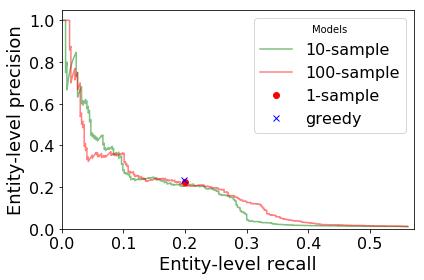

In [6]:
#precision recall curves
models = ['dicts_allsent_10samp.out', 'dicts_allsent_100samp.out']
labels = ['10-sample', '100-sample']

P, R = [], []
for modelfile, label in zip(models, labels):
    print '===', label
    precs, recs = get_pr(modelfile, testents, histents)
    P.append(precs)
    R.append(recs)
    print ''

assert len(models) == len(labels) == len(P) == len(R)


#plot the curves 
M = len(P)
colors = ['g', 'r', 'b','m']
#markers = ['v', '+', 'x', 'o', 's', '*', '^']

ax1 = plt.subplot(111)

A = []
for m in range(M):
    ax1.plot(R[m], P[m], color=colors[m], alpha=.5, label=labels[m])

leg_title = "Models"


ax1.set_xlabel('Entity-level recall', fontsize=18)
ax1.set_ylabel('Entity-level precision', fontsize=18)
ax1.set_xlim((0, max(R[0])+.01))
ax1.set_ylim((0, 1.05))

#plot just the PR points 
# models = ['dicts_allsent_1samp.out', 'dicts_allsent_greedy.out', 'dicts_allsent_samplemap_100samp.out', 'dicts_allsent_samplemap_10sample.out']
# labels = ['1-sample', 'greedy', 'MAP-100samp', 'MAP-10samp']
models = ['dicts_allsent_1samp.out', 'dicts_allsent_greedy.out']
labels = ['1-sample', 'greedy']
styles = ['ro', 'bx', 'gs', 'yv']
# fig = plt.figure()
for mfile, label, sty in zip(models, labels, styles): 
    print '===', label 
    prec, rec, f1= or_point(mfile, testents, histents)
    print 'f1={0}, prec={1}, rec={2}'.format(f1, prec, rec) 
    print ''
    #plotting
    ax1.plot(prec, rec, sty, label=label)
    
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width, box.height])
#ax1.legend((A[i] for i in range(M)), (labels[i] for i in range(M)), title=leg_title, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
ax1.legend(title=leg_title, loc=1, fontsize=16)
ax1.tick_params(labelsize=16)
plt.tight_layout()
graph_f = '../../writing/pf-prrec.pdf'
plt.savefig(graph_f)
print "graph saved to {0}".format(graph_f)
plt.show()

In [8]:
#todo: histograms of the weights 
#sentence level histogram of predictions for each of the files 
fnames = ['dicts_allsent_10samp.out', 'dicts_allsent_100samp.out'] + ['dicts_allsent_1samp.out', 'dicts_allsent_greedy.out', 'dicts_allsent_samplemap_100samp.out', 'dicts_allsent_samplemap_10sample.out']
titles = ['10-sample', '100-sample'] + ['1-sample', 'greedy', 'MAP-100samp', 'MAP-10samp']
ttl2wtcts = {}
for fn, title in zip(fnames, titles): 
    weight_counts = Counter()
    for line in open(fn, 'r'):
        wt = json.loads(line)['weight']
        weight_counts[wt] += 1
    ttl2wtcts[title] = weight_counts
    print title, weight_counts, '\n'

10-sample Counter({0.0: 66059, 1.0: 727, 0.1: 483, 0.9: 371, 0.8: 271, 0.7: 222, 0.6: 187, 0.2: 182, 0.5: 162, 0.4: 140, 0.3: 121}) 

100-sample Counter({0.0: 64716, 0.01: 751, 0.02: 295, 0.03: 185, 0.99: 165, 1.0: 132, 0.04: 130, 0.98: 127, 0.05: 97, 0.97: 89, 0.96: 78, 0.06: 71, 0.94: 64, 0.95: 57, 0.07: 55, 0.93: 54, 0.09: 48, 0.92: 45, 0.87: 43, 0.89: 42, 0.9: 40, 0.88: 39, 0.12: 38, 0.85: 38, 0.81: 38, 0.7: 37, 0.08: 34, 0.91: 34, 0.11: 32, 0.83: 32, 0.86: 31, 0.75: 30, 0.8: 30, 0.79: 30, 0.18: 30, 0.82: 29, 0.78: 28, 0.73: 28, 0.62: 27, 0.13: 25, 0.76: 25, 0.68: 25, 0.15: 24, 0.84: 24, 0.72: 24, 0.52: 24, 0.64: 23, 0.1: 23, 0.56: 23, 0.55: 22, 0.53: 22, 0.71: 22, 0.61: 22, 0.66: 21, 0.63: 21, 0.6: 21, 0.26: 20, 0.19: 20, 0.67: 20, 0.48: 20, 0.5: 19, 0.14: 19, 0.74: 19, 0.58: 18, 0.77: 18, 0.31: 18, 0.17: 18, 0.46: 17, 0.43: 17, 0.57: 17, 0.22: 17, 0.47: 16, 0.65: 16, 0.23: 16, 0.42: 15, 0.59: 15, 0.34: 15, 0.44: 15, 0.21: 15, 0.16: 15, 0.2: 15, 0.49: 14, 0.24: 14, 0.51: 14, 0.33:

100 MC SAMPLES
0.0: 64716
remove 0.0 b/c then cant see rest of histogram


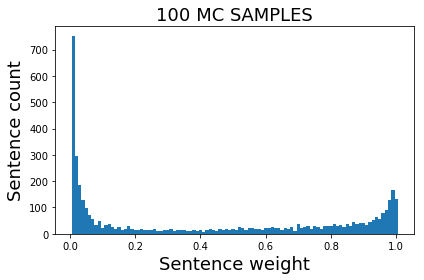

In [45]:
#100 sample
print '100 MC SAMPLES'
a = ttl2wtcts['100-sample']
a = dict(a)
print '0.0:', a[0.0]
print 'remove 0.0 b/c then cant see rest of histogram'
del a[0.0]
#print a
plt.bar(a.keys(), a.values(), 0.01)
plt.title('100 MC SAMPLES', fontsize=18)
plt.xlabel('Sentence weight', fontsize=18)
plt.ylabel('Sentence count', fontsize=18)
plt.tight_layout()
plt.savefig('../../writing/hist-greedy-vs-samp.png', bbox_inches='tight')
plt.show()

10 MC SAMPLES
0.0: 66059
remove 0.0 b/c then cant see rest of histogram
{1.0: 727, 0.1: 483, 0.8: 271, 0.4: 140, 0.6: 187, 0.3: 121, 0.2: 182, 0.9: 371, 0.7: 222, 0.5: 162}


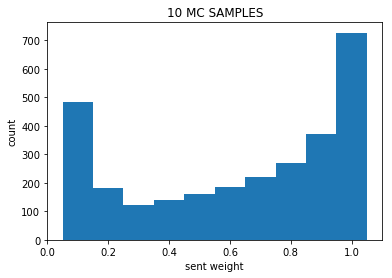

In [10]:
#10 sample
print '10 MC SAMPLES'
a = ttl2wtcts['10-sample']
a = dict(a)
print '0.0:', a[0.0]
print 'remove 0.0 b/c then cant see rest of histogram'
del a[0.0]
print a
plt.bar(a.keys(), a.values(), 0.1)
plt.title('10 MC SAMPLES')
plt.xlabel('sent weight')
plt.ylabel('count')
plt.show()

In [11]:
#for the rest just print out raw numbers and percentages? (I don't think the histograms are too informative)
for title, weightcounts in ttl2wtcts.iteritems():
    total = sum(weightcounts.values())
    n0 = weightcounts[0.0]
    n1 = weightcounts[1.0]
    print '===', title
    print 'COUNTS 0={0}, 1={1}'.format(n0, n1)
    print 'PERC.  0={0}, 1={1}'.format(round(n0/total, 3), round(n1/total, 3))
    print ''

=== MAP-100samp
COUNTS 0=66881, 1=2044
PERC.  0=0.97, 1=0.03

=== greedy
COUNTS 0=66902, 1=2023
PERC.  0=0.971, 1=0.029

=== 100-sample
COUNTS 0=64716, 1=132
PERC.  0=0.939, 1=0.002

=== MAP-10samp
COUNTS 0=66975, 1=1950
PERC.  0=0.972, 1=0.028

=== 1-sample
COUNTS 0=67111, 1=1814
PERC.  0=0.974, 1=0.026

=== 10-sample
COUNTS 0=66059, 1=727
PERC.  0=0.958, 1=0.011



## Mon Nov 27, 2017: rule-based hard vs. soft histograms 

In [12]:

# # fnames = ['dicts_10samp.out', 'dicts_100samp.out'] + ['dicts_allsent_1samp.out', 'dicts_allsent_greedy.out', 'dicts_allsent_samplemap_100samp.out', 'dicts_allsent_samplemap_10sample.out']
# # titles = ['10-sample', '100-sample'] + ['1-sample', 'greedy', 'MAP-100samp', 'MAP-10samp']
# # ttl2wtcts = {}

# greedy_class = defaultdict(list)
# for line in open('dicts_allsent_greedy.out', 'r'):
#     dd = json.loads(line)
#     wt = dd['weight']
#     docid = dd['docid']
#     greedy_class[wt].append(docid)
    
# for cls, lst in greedy_class.iteritems():
#     print cls, len(lst)

In [13]:
#Mon Nov 27, 2017 
#rule-based hard vs. soft histograms 
# fnames = ['dicts_10samp.out', 'dicts_100samp.out'] + ['dicts_allsent_1samp.out', 'dicts_allsent_greedy.out', 'dicts_allsent_samplemap_100samp.out', 'dicts_allsent_samplemap_10sample.out']
# titles = ['10-sample', '100-sample'] + ['1-sample', 'greedy', 'MAP-100samp', 'MAP-10samp']
# ttl2wtcts = {}

docid2class  = {}
for line in open('dicts_allsent_greedy.out', 'r'):
    dd = json.loads(line)
    wt = dd['weight']
    docid = dd['docid']
    name = dd['name']
    docid2class[(docid, name)] = wt 
print 'NUM DOCS=', len(docid2class)

NUM DOCS= 68925


In [17]:
#then run thru the 10-sample and 100-sample to get the histograms 
fnames = ['dicts_allsent_10samp.out', 'dicts_allsent_100samp.out'] 
titles = ['10-sample', '100-sample']

#initialize counters
wtcts_dict = {}
for cls in [0, 1]:
    for ttl in titles: 
        wtcts_dict[(cls, ttl)] = Counter()
    
for fn, ttl in zip(fnames, titles): 
    for line in open(fn, 'r'):
        dd = json.loads(line)
        wt = dd['weight']
        docid = dd['docid']
        name = dd['name']
        cls = docid2class[(docid, name)]
        wtcts_dict[(cls, ttl)][wt] += 1
        
for cls in [0, 1]:
    for ttl in titles: 
        print wtcts_dict

{(1, '100-sample'): Counter({0.99: 165, 1.0: 132, 0.98: 127, 0.97: 89, 0.96: 78, 0.94: 64, 0.95: 57, 0.93: 54, 0.92: 45, 0.87: 43, 0.89: 42, 0.9: 40, 0.88: 39, 0.85: 38, 0.81: 38, 0.7: 36, 0.91: 34, 0.83: 32, 0.86: 31, 0.75: 30, 0.8: 30, 0.79: 30, 0.82: 29, 0.78: 28, 0.62: 27, 0.73: 27, 0.76: 25, 0.84: 24, 0.72: 24, 0.71: 22, 0.68: 22, 0.64: 22, 0.63: 21, 0.6: 20, 0.66: 20, 0.67: 19, 0.55: 19, 0.61: 19, 0.56: 19, 0.52: 19, 0.74: 19, 0.5: 18, 0.58: 18, 0.53: 18, 0.57: 17, 0.77: 17, 0.48: 16, 0.59: 15, 0.65: 15, 0.46: 12, 0.47: 12, 0.69: 12, 0.54: 12, 0.49: 10, 0.31: 10, 0.29: 10, 0.51: 8, 0.43: 7, 0.45: 7, 0.42: 6, 0.3: 6, 0.22: 6, 0.44: 6, 0.39: 5, 0.38: 4, 0.4: 4, 0.37: 4, 0.35: 4, 0.33: 4, 0.2: 3, 0.28: 3, 0.41: 3, 0.26: 3, 0.11: 3, 0.34: 3, 0.17: 3, 0.27: 3, 0.25: 2, 0.19: 2, 0.36: 2, 0.32: 2, 0.06: 2, 0.13: 1, 0.0: 1, 0.01: 1, 0.18: 1, 0.23: 1, 0.02: 1, 0.04: 1}), (0, '10-sample'): Counter({0.0: 66047, 0.1: 465, 0.2: 155, 0.3: 86, 0.4: 66, 0.5: 31, 0.6: 28, 0.7: 17, 0.9: 4, 0.8: 3}

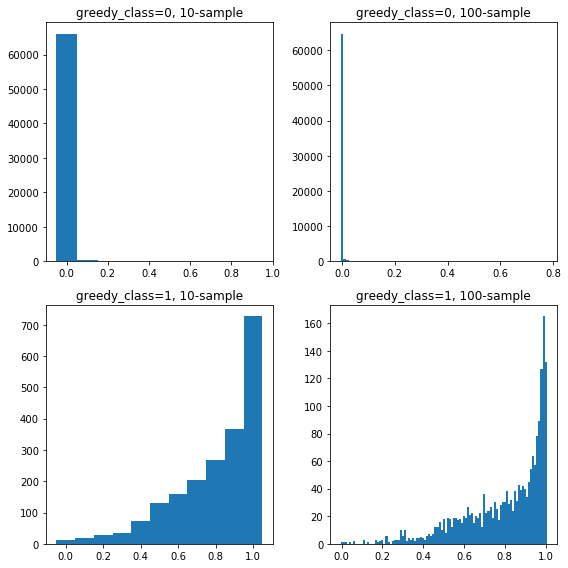

In [18]:
#then plot them 
plt.figure(figsize=(8,8))
for i, k in enumerate(sorted(wtcts_dict.keys())):
    plt.subplot(2,2,i+1)
    cnts = wtcts_dict[k]
    if k[1] == '10-sample': step = 0.1
    else: step = 0.01
    plt.bar(cnts.keys(), cnts.values(), step)
    plt.title('greedy_class={0}, {1}'.format(k[0], k[1]))
plt.tight_layout()
#plt.savefig('hist-greedy-vs-samp.png', bbox_inches='tight')
plt.show()

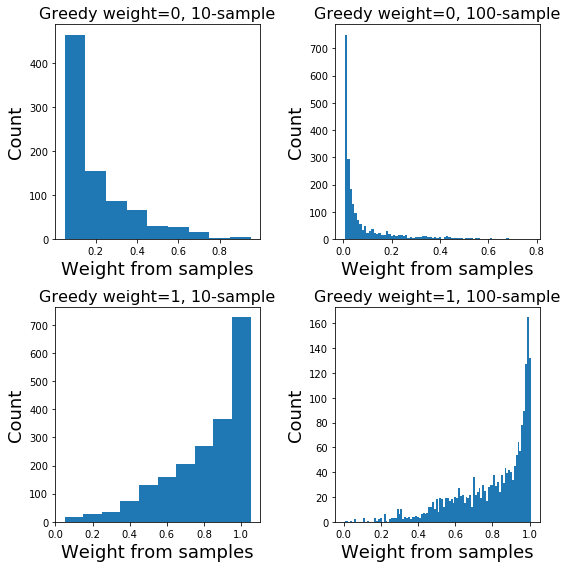

In [27]:
#really hard to see the class 0 histograms 
plt.figure(figsize=(8,8))
for i, k in enumerate(sorted(wtcts_dict.keys())):
    plt.subplot(2,2,i+1)
    plt.xlabel('Weight from samples', fontsize=18)
    plt.ylabel('Count', fontsize=18)
    cnts = wtcts_dict[k].copy()
    del cnts[0.0]
    if k[1] == '10-sample': step = 0.1
    else: step = 0.01
    plt.bar(cnts.keys(), cnts.values(), step)
    plt.title('Greedy weight={0}, {1}'.format(k[0], k[1]), fontsize=16)
plt.tight_layout()
plt.savefig('../../writing/hist-greedy-vs-samp.png', bbox_inches='tight')
plt.show()

### now only plot the 100 samples
the 100 samples and 10 samples illustrate the same point

64715
1


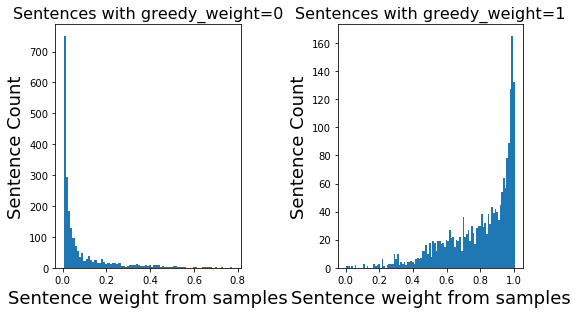

In [42]:
#then run thru the 10-sample and 100-sample to get the histograms 
fnames = ['dicts_allsent_100samp.out'] 
titles = ['100-sample']

#initialize counters
wtcts_dict = {}
for cls in [0, 1]:
    for ttl in titles: 
        wtcts_dict[(cls, ttl)] = Counter()
    
for fn, ttl in zip(fnames, titles): 
    for line in open(fn, 'r'):
        dd = json.loads(line)
        wt = dd['weight']
        docid = dd['docid']
        name = dd['name']
        cls = docid2class[(docid, name)]
        wtcts_dict[(cls, ttl)][wt] += 1

#really hard to see the class 0 histograms 
plt.figure(figsize=(8,8))
for i, k in enumerate(sorted(wtcts_dict.keys())):
    plt.subplot(2,2,i+1)
    plt.xlabel('Sentence weight from samples', fontsize=18)
    plt.ylabel('Sentence Count', fontsize=18)
    cnts = wtcts_dict[k].copy()
    print cnts[0.0]
    del cnts[0.0]
    if k[1] == '10-sample': step = 0.1
    else: step = 0.01
    plt.bar(cnts.keys(), cnts.values(), step)
    plt.title('Sentences with greedy_weight={0}'.format(k[0], k[1]), fontsize=16)
plt.tight_layout()
plt.savefig('../../writing/hist-greedy-vs-samp.png', bbox_inches='tight')
plt.show()

### now look at the "high entropy" sample sentences (where greedy weight is 0 but sample histogram weight is >0.5 or the reverese

In [20]:
fnames = ['dicts_10samp.out', 'dicts_100samp.out'] 
titles = ['10-sample', '100-sample']

def get_the_sents(cls_target, weight_target):
    print '===GREEDY_WEIGHT={c}, SAMP_WEIGHT>={w} === \n'.format(c=cls_target, w=weight_target)
    for fn, ttl in zip(fnames, titles): 
        for line in open(fn, 'r'):
            dd = json.loads(line)
            wt = dd['weight']
            docid = dd['docid']
            name = dd['name']
            cls = docid2class[(docid, name)]

            if cls == cls_target and wt >= weight_target:
                print dd['sent_alter']
                print ''

In [21]:
#then run thru the 10-sample and 100-sample to get the histograms 
# cls_target = 0.0 #class I want to look at 
# weight_target = 0.8 #weight I want to look at 

get_the_sents(0.0, 0.8)
#get_the_sents(1.0, 0.1)

===GREEDY_WEIGHT=0.0, SAMP_WEIGHT>=0.8 === 



IOError: [Errno 2] No such file or directory: 'dicts_10samp.out'

In [ ]:
get_the_sents(1.0, 0.1)

### to do: look at a couple of these examples here. show what the
- greedy parse does, show what the samples give
- can we do a gold-version of it? 